In [2]:
using AA222

# Bracketing

In [3]:
function bracketMinimum(f, x0 = 0, step = 1e-2, expansion = 2.0)
    x1 = x0
    f1 = f(x1)
    x2 = x1 + step
    f2 = f(x2)
    if f2 > f1
        (x1, x2) = (x2, x1)
        (f1, f2) = (f2, f1)
        step = -step;
    end
    while x1 < 1e30
        step = step * expansion
        x4 = x2 + step
        f4 = f(x4)
        if f4 > f2
            return x1 < x4 ? (x1, x4) : (x4, x1)
        end
        (x1, f1, x2, f2) = (x2, f2, x4, f4)
    end
end    

bracketMinimum (generic function with 4 methods)

In [4]:
bracketMinimum(x->x^2)

(-0.02,0.01)

# Fibonacci search

Binet's formula
$$F_i = \frac1{\sqrt{5}}\left[\left(\frac{1+\sqrt{5}}{2}\right)^{i+1} - \left(\frac{1+\sqrt{5}}{2}\right)^{i+1}\right]$$

In [5]:
fibonacciNumber(i) = (((1+√5)/2)^(i+1) - ((1-√5)/2)^(i+1))/√5

fibonacciNumber (generic function with 1 method)

In [6]:
fibonacciNumber(5)

8.000000000000002

Ratio between two consecutive Fibonacci numbers:
$$\frac{F_{i-1}}{F_i} = c \left(\frac{1-s^i}{1-s^{i+1}} \right)$$
where
$$c = \frac{\sqrt{5} - 1}{2}$$
$$s = \frac{1 - \sqrt 5}{1+ \sqrt 5}$$

In [7]:
function fibonacciSearch(f, x1, x4, n)
    c = (sqrt(5) - 1) / 2
    s = (1 - sqrt(5)) / (1 + sqrt(5))
    al = c * (1 - s^n) / (1 - s^(n + 1))
    x3 = al * x4 + (1 - al) * x1
    f3 = f(x3)
    for i = 1 : n - 1
        if i == n - 1
            x2 = .01 * x1 + .99 * x3
        else
            x2 = al * x1 + (1 - al) * x4
        end
        f2 = f(x2)
        if f2 < f3
            x4 = x3
            x3 = x2
            f3 = f2
        else
            x1 = x4
            x4 = x2
            f4 = f2
        end
        al = c * (1 - s^(n - i)) / (1 - s^(n - i + 1))
    end
    return x1 < x4 ? (x1, x4) : (x4, x1)
end

fibonacciSearch (generic function with 1 method)

In [8]:
steps = 5
fibonacciSearch(x->x^2, -1, 1, steps)

(-0.0024999999999999727,0.25)

In [9]:
function fibonacciSearchWithHistory(f, x1, x4, n)
    c = (sqrt(5) - 1) / 2
    s = (1 - sqrt(5)) / (1 + sqrt(5))
    al = c * (1 - s^n) / (1 - s^(n + 1))
    x3 = al * x4 + (1 - al) * x1
    f3 = f(x3)
    X1 = zeros(n)
    X4 = zeros(n)
    X1[1], X4[1] = x1, x4
    for i = 1 : n - 1
        if i == n - 1
            x2 = .01 * x1 + .99 * x3
        else
            x2 = al * x1 + (1 - al) * x4
        end
        f2 = f(x2)
        if f2 < f3
            x4 = x3
            x3 = x2
            f3 = f2
        else
            x1 = x4
            x4 = x2
            f4 = f2
        end
        al = c * (1 - s^(n - i)) / (1 - s^(n - i + 1))
        X1[i+1], X4[i+1] = x1, x4
    end
    return X1, X4
end;

In [10]:
function plotFibonacciSearch(f, lo, hi, steps)
    xdom(lo, hi)
    xlim(lo, hi)
    subplot(211)
    hold("off")
    plot(f, lo, hi)
    subplot(212)
    hold("off")
    LO, HI = fibonacciSearchWithHistory(f, lo, hi, steps)
    for i = 1:steps
        plot([LO[i], HI[i]], [i, i])
    end
    xlim(lo, hi)
    ylim(0, steps + 1)
end;

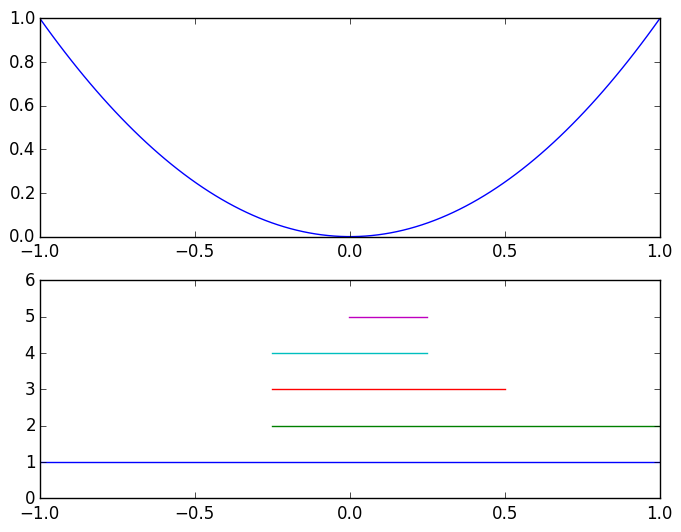

(0,6)

In [11]:
plotFibonacciSearch(x->x^2, -1, 1, 5)

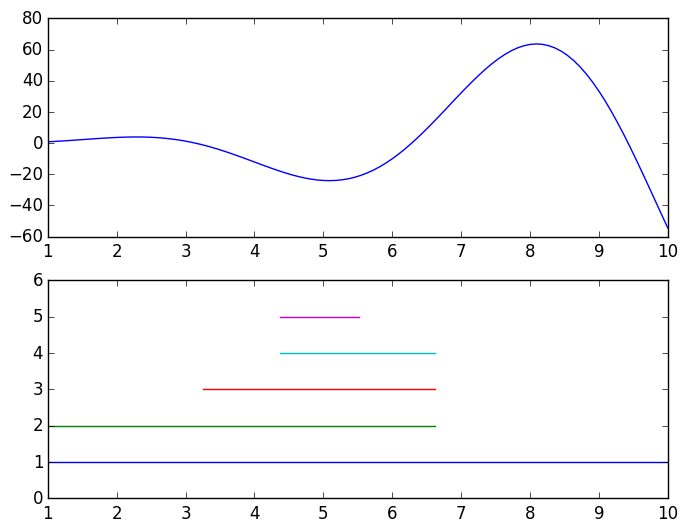

(0,6)

In [14]:
plotFibonacciSearch(x->sin(x)*x^2, 1, 10, 5); # why is the minimum not found?

# Golden Section Algorithm Search

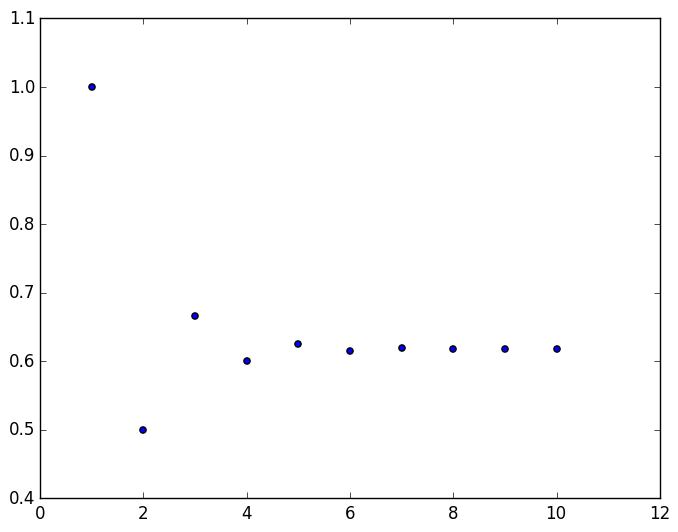

In [15]:
c = (√5 - 1) / 2
s = (1 - √5) / (1 + √5)
f(n) = c * (1 - s^n) / (1 - s^(n + 1))
scatter(f, 1:10);

In [16]:
function goldenSectionSearch(f, x1, x4, n)
    al = (sqrt(5) - 1) / 2
    x3 = al * x4 + (1 - al) * x1
    f3 = f(x3)
    for i = 1 : n - 1
        x2 = al * x1 + (1 - al) * x4
        f2 = f(x2)
        if f2 < f3
            x4 = x3
            x3 = x2
            f3 = f2
        else
            x1 = x4
            x4 = x2
            f4 = f2
        end
    end
    return x1 < x4 ? (x1, x4) : (x4, x1)
end

goldenSectionSearch (generic function with 1 method)

In [17]:
goldenSectionSearch(x->x^2, -1, 1, 3)

(-0.2360679774997898,0.5278640450004206)

In [18]:
fibonacciSearch(x->x^2, -1, 1, 3)

(-0.3333333333333335,0.34000000000000014)

# Bisection Method

In [19]:
function bisectionMethod(f, lo, hi, n)
    flo = f(lo)
    fhi = f(hi)
    assert(sign(flo) != sign(fhi))
    for i = 1:n
        x = (lo + hi) / 2
        fx = f(x)
        if fx == 0
            return (x, x)
        end
        if sign(fx) != sign(flo)
            # new interval is [lo, x]
            hi, fhi = x, fx
        else
            # new interval is [x, hi]
            lo, flo = x, fx
        end
    end
    return (lo, hi)
end

bisectionMethod (generic function with 1 method)

In [20]:
bisectionMethod(x -> (x + 0.1)^3, -10, 10, 30)

(-0.10000001639127731,-0.09999999776482582)